<a href="https://colab.research.google.com/github/ahmadrifaa/UAS-AI/blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fdata="https://raw.githubusercontent.com/ahmadrifaa/UAS/refs/heads/main/dataset/obesity_classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [6]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [7]:
from sklearn.model_selection import train_test_split
y=df.Gender
X=df.drop("Gender", axis=1)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4, shuffle=True, stratify=y,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 64
Jumlah data test : 44


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [ ]:
scl=StandardScaler()
x_train_scl=scl.fit_transform(x_train)
x_test_scl=scl.transform(x_test)

lbl_encoder=LabelEncoder()
y_train_enc=lbl_encoder.fit_transform(y_train)
y_test_enc=lbl_encoder.transform(y_test)

In [13]:
x_train

,ID,Age,Height,Weight,BMI,Label
37,40,64,120,95,29.1,Overweight
32,35,39,190,95,27.0,Overweight
42,45,37,190,85,26.1,Overweight
41,44,32,150,55,21.2,Normal Weight
2,3,35,180,90,27.3,Overweight
...,...,...,...,...,...,...
19,21,63,120,30,13.3,Underweight
99,102,42,200,30,13.3,Underweight
35,38,54,130,85,27.5,Overweight
96,99,27,150,20,8.3,Underweight


In [19]:
x_train_scl

array([[-0.58284225,  0.84463295, -1.55767339,  1.1422475 ,  1.04632789,
        -0.37796447,  1.88982237, -0.82717019],
       [-0.75286004, -0.29100799,  0.85281945,  1.1422475 ,  0.77026493,
        -0.37796447,  1.88982237, -0.82717019],
       [-0.41282445, -0.38185927,  0.85281945,  0.80064077,  0.65195224,
        -0.37796447,  1.88982237, -0.82717019],
       [-0.44682801, -0.60898745, -0.52460503, -0.22417942,  0.00780535,
        -0.37796447, -0.52915026, -0.82717019],
       [-1.84097392, -0.47271054,  0.50846333,  0.97144413,  0.8097025 ,
        -0.37796447,  1.88982237, -0.82717019],
       [-0.2088031 ,  0.98090986,  0.33628527,  0.11742731,  0.20499317,
        -0.37796447, -0.52915026, -0.82717019],
       [ 0.64128586, -0.24558235, -0.86896115, -0.39498278, -0.14994491,
        -0.37796447, -0.52915026,  1.20894105],
       [-0.27681022,  0.52665349,  1.54153169,  1.48385423,  1.02003618,
         2.64575131, -0.52915026, -0.82717019],
       [ 0.84530722, -1.19952074

In [20]:
y_train

,Gender
37,Female
32,Male
42,Male
41,Female
2,Male
...,...
19,Female
99,Male
35,Female
96,Female


In [21]:
y_train_enc

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 0.95


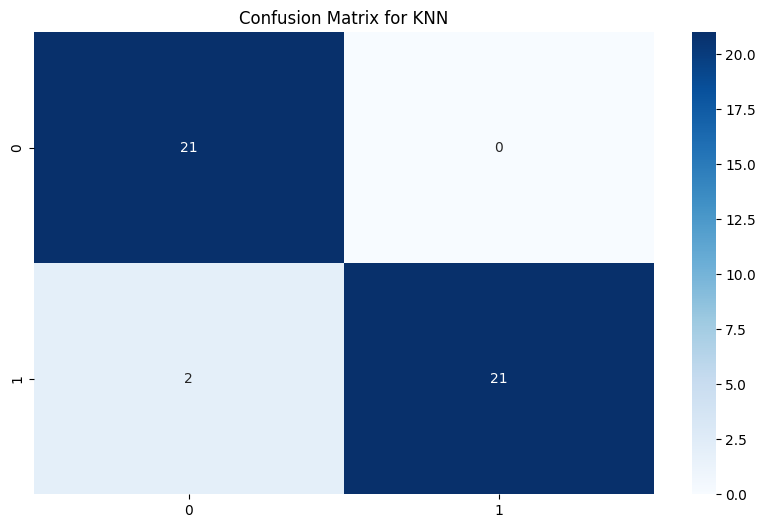

In [61]:
cm=confusion_matrix(y_test_enc,knn_predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score

In [38]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[0.84615385 0.84615385 1.         0.92307692 1.        ]
Rata score dengan 5 fold : 0.9230769230769231


In [58]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

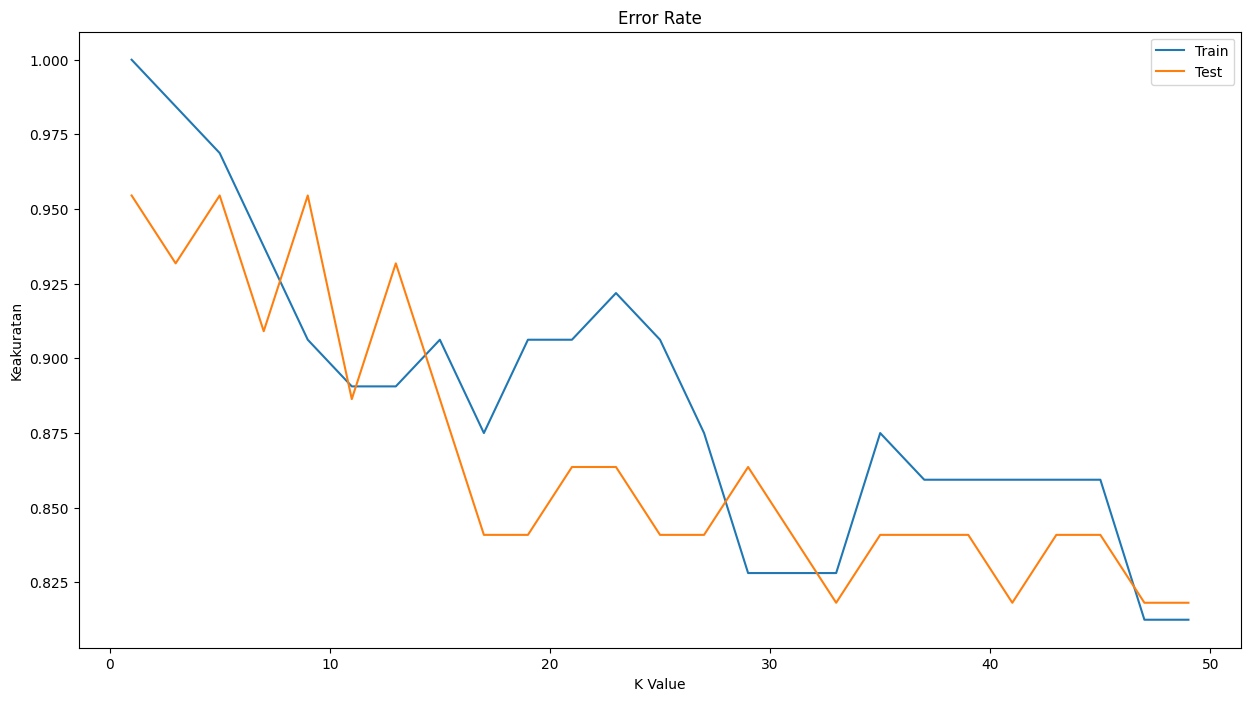

In [63]:
plt.figure(figsize=(15,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')
plt.title('Error Rate')
plt.xlabel('K Value')
plt.ylabel('Keakuratan')

plt.legend()
plt.show()

In [62]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 0.9545454545454546
K Neighboard terbaik adalah 1


In [66]:
k_values = list(range(1, 11))

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scl, y_train_enc)
    prediction = model.predict(x_test_scl)
    accuracy = model.score(x_test_scl, y_test_enc)
    print(f"Accuracy for k={k}: {accuracy}")

Accuracy for k=1: 0.9545454545454546
Accuracy for k=2: 0.9318181818181818
Accuracy for k=3: 0.9318181818181818
Accuracy for k=4: 0.8409090909090909
Accuracy for k=5: 0.9545454545454546
Accuracy for k=6: 0.8409090909090909
Accuracy for k=7: 0.9090909090909091
Accuracy for k=8: 0.9318181818181818
Accuracy for k=9: 0.9545454545454546
Accuracy for k=10: 0.8636363636363636


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test_enc, knn.predict(x_test_scl)))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        21
           1       1.00      0.65      0.79        23

    accuracy                           0.82        44
   macro avg       0.86      0.83      0.81        44
weighted avg       0.87      0.82      0.81        44

